In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")
df.shape

(2612, 10)

In [3]:
df.head(5)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2612 non-null   object        
 1   Market          2612 non-null   object        
 2   Name            2612 non-null   object        
 3   Sector          2411 non-null   object        
 4   Industry        2391 non-null   object        
 5   ListingDate     2411 non-null   datetime64[ns]
 6   SettleMonth     2411 non-null   object        
 7   Representative  2411 non-null   object        
 8   HomePage        2238 non-null   object        
 9   Region          2411 non-null   object        
 10  ListingYear     2411 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 224.6+ KB


In [7]:
df[df["Name"] == "금양"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
325,001570,KOSPI,금양,기초 화학물질 제조업,"발포제,사카린,OPTSA,베나졸,TCA 제조",1976-12-17,12월,류광지,http://www.kyc.co.kr,부산광역시


In [10]:
df.loc[(df["Region"] == "대구광역시") &(df["Market"] == "KOSPI"), ["Name","Symbol"] ]

,Name,Symbol
33,DGB금융지주,139130
364,남선알미늄,008350
446,대구백화점,006370
452,대동공업,000490
474,대성에너지,117580
478,대성홀딩스,016710
536,대호에이엘,069460
989,삼익THK,004380
1018,상신브레이크,041650
1070,성안,011300


In [17]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [18]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'AppleGothic'

In [19]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/yh/vj2j94_j4xb1mfs37dz6pll00000gn/T/ipykernel_10356/1991645101.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:>

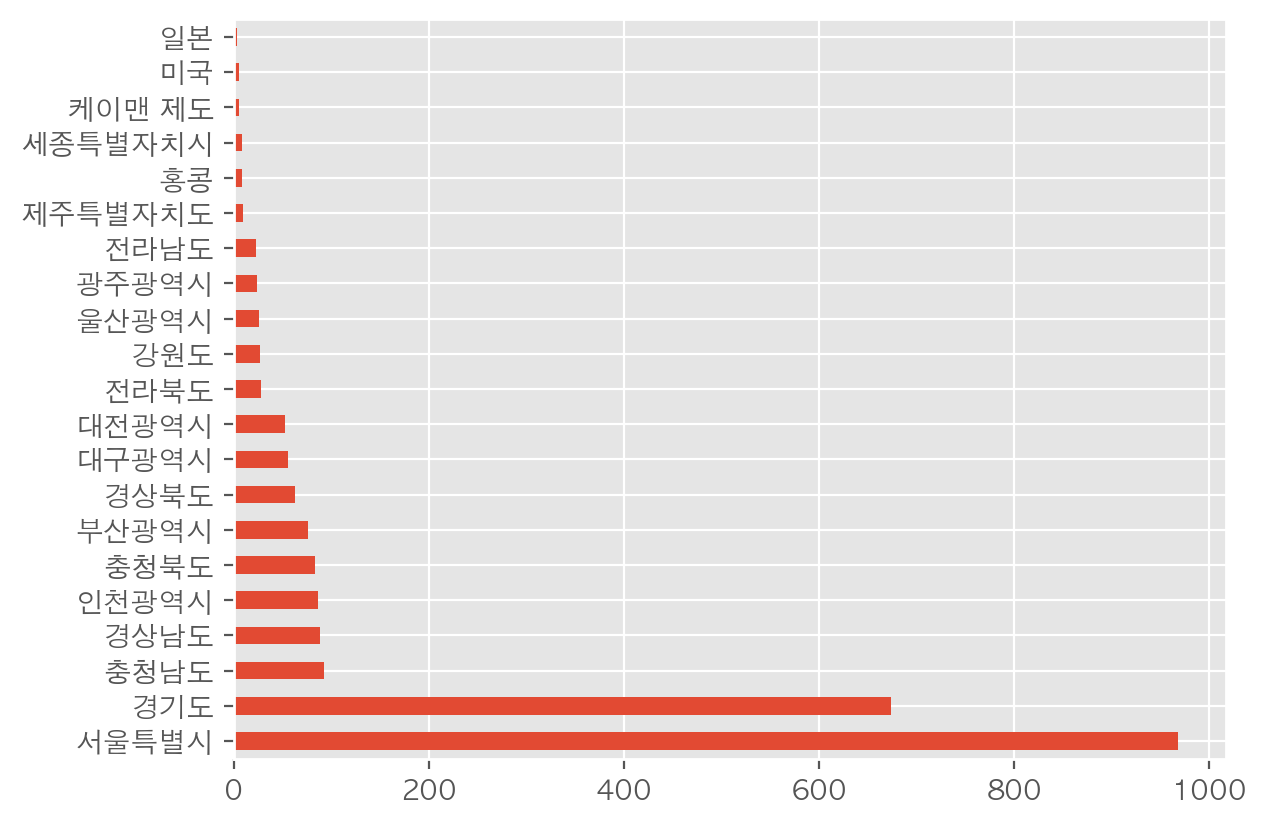

In [20]:
import matplotlib.pyplot as plt
df["Region"].value_counts().plot.barh()

In [22]:
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,37,0,7,6,1,7,0,1,54,...,0,4,0,3,1,1,4,9,0,0
KOSDAQ,16,492,49,37,9,34,38,5,38,508,...,10,57,3,13,16,2,63,60,4,9
KOSPI,4,145,40,19,9,21,8,0,37,407,...,16,25,0,7,11,7,26,14,1,0


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Region'>

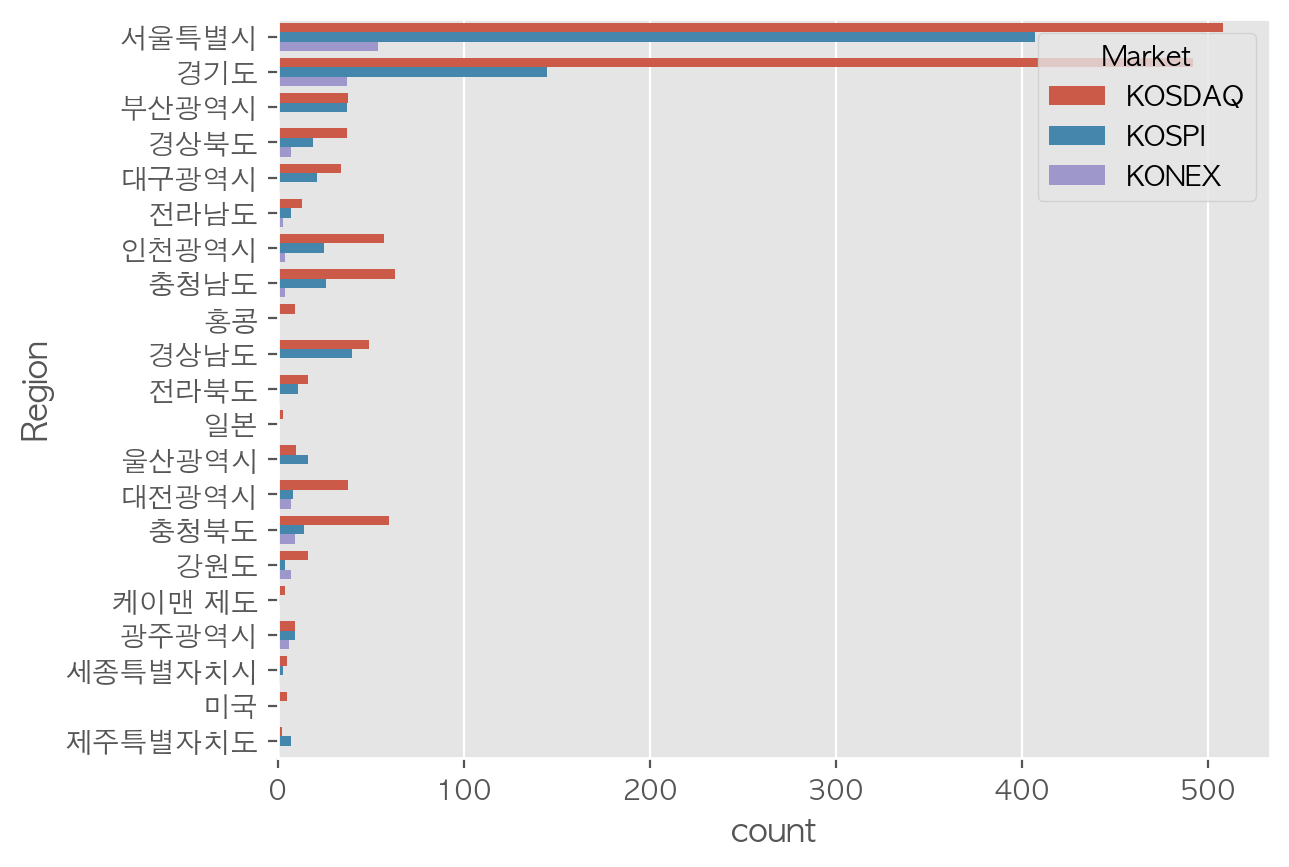

In [24]:
sns.countplot(data=df, y="Region", hue="Market")

In [28]:
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingYear"] = df["ListingDate"].dt.year

In [29]:
# Market, ListingYear 빈도수 구하기
df_market_year = pd.crosstab(df["Market"], df["ListingYear"])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


In [39]:
df_year_market = df.groupby(
    ["ListingYear", "Market"]) ["Symbol"].count().reset_index(name="count")
df_year_market

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

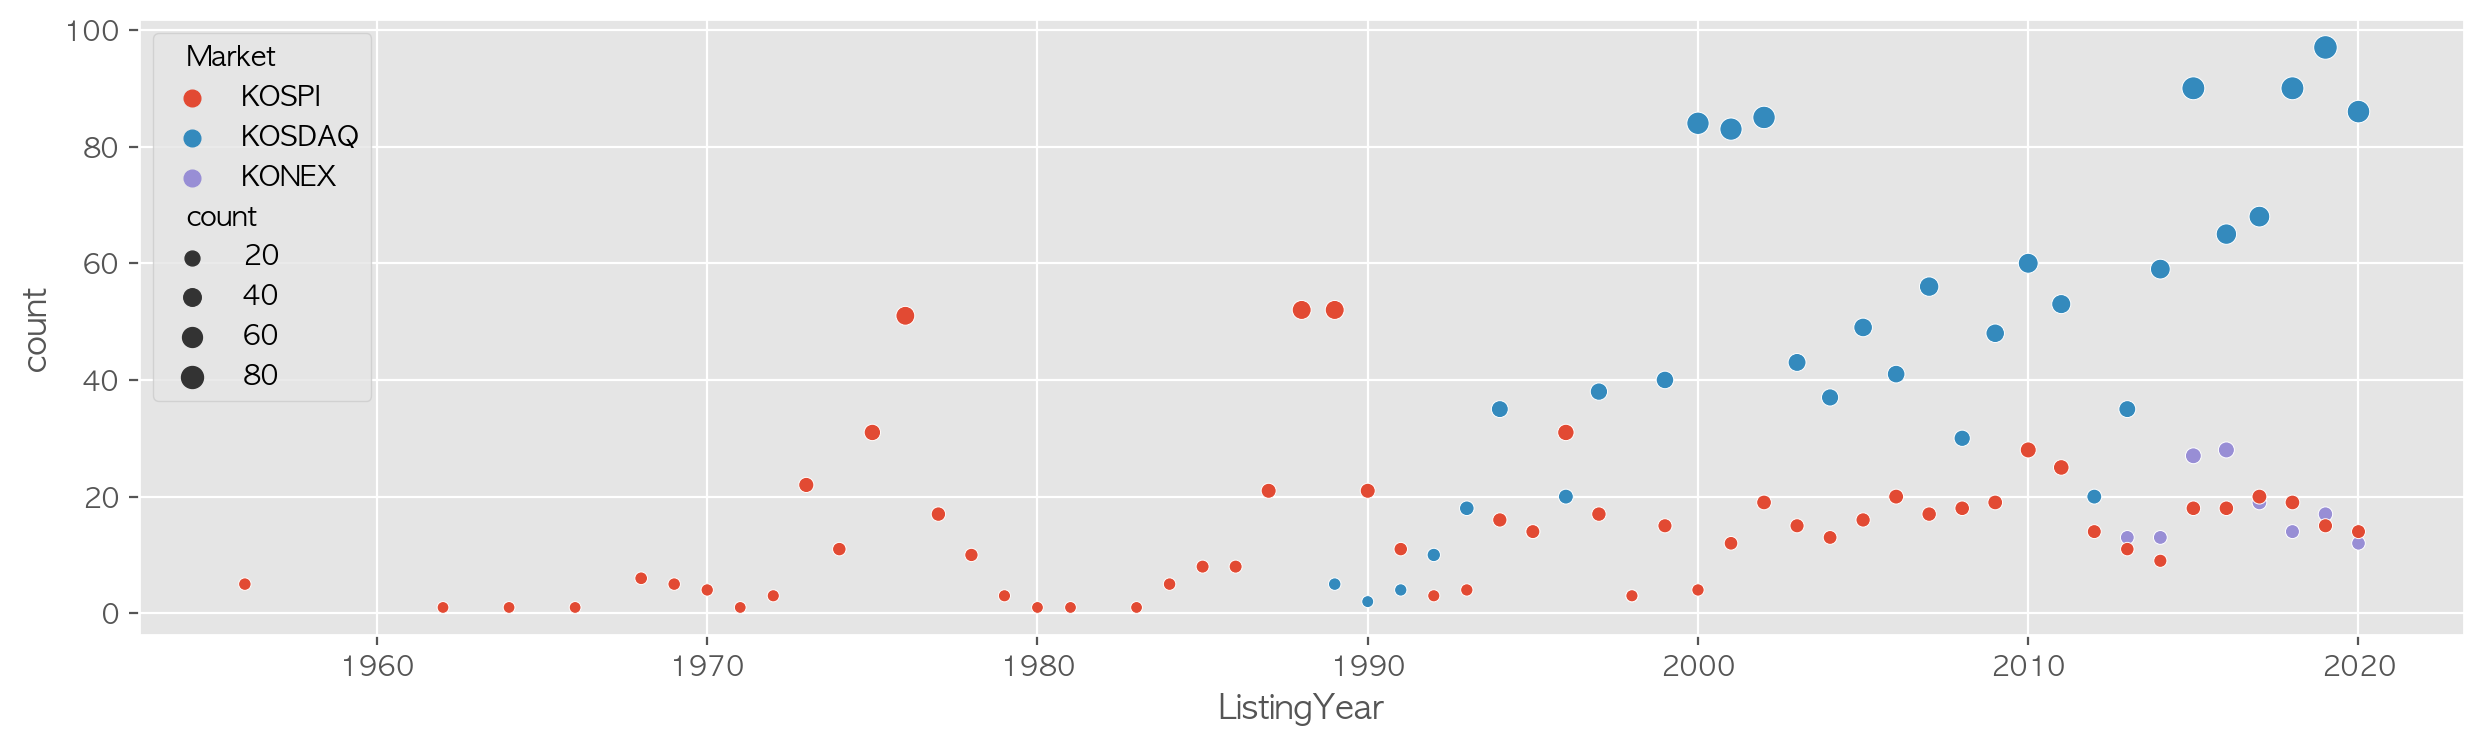

In [41]:
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df_year_market,
               x="ListingYear", y="count", hue="Market", size="count")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

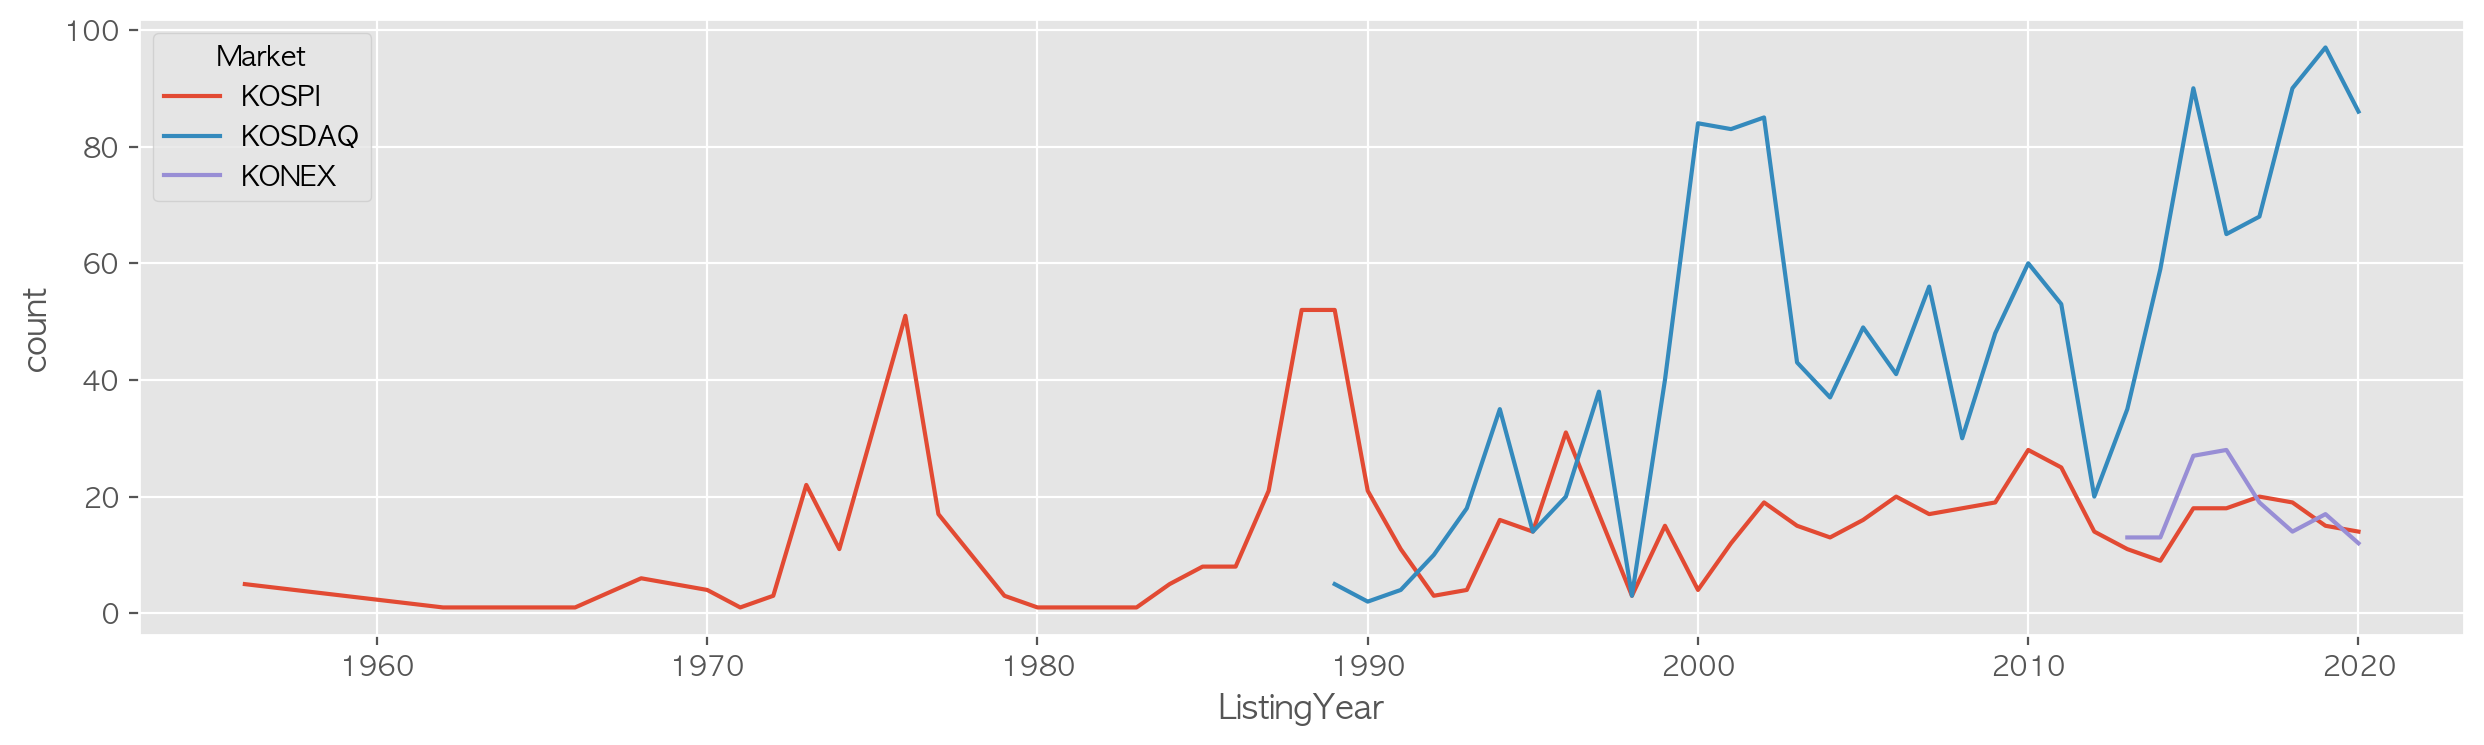

In [42]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_year_market, x="ListingYear", y="count", hue="Market", ci=None)


In [43]:
df.head(5)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0


In [54]:
df[(df['Name'] == '에코프로비엠') |  (df['Name'] == '에코프로')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
1459,086520,KOSDAQ,에코프로,기타 화학제품 제조업,"환경소재,화학필터,이차전지소재등",2007-07-20,12월,이동채,http://www.ecopro.co.kr,충청북도,2007.0
1460,247540,KOSDAQ,에코프로비엠,일차전지 및 축전지 제조업,양극활물질,2019-03-05,12월,권우석,http://www.ecoprobm.co.kr,충청북도,2019.0


In [69]:
df[df["Region"] == "경상북도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
26,000590,KOSPI,CS홀딩스,기타 금융업,"브랜드 수익, 자회사 배당",1975-12-22,12월,임규섭,http://www.chosunwelding.com,경상북도,1975.0
49,130500,KOSDAQ,GH신소재,기타 섬유제품 제조업,"자동차용 부직포, 폴리우레탄 폼",2013-08-02,12월,우희구,http://www.gumho-nt.com,경상북도,2013.0
109,060720,KOSDAQ,KH바텍,전자부품 제조업,"휴대폰부품(SHIELD, BRACKET)",2002-05-21,12월,남광희,http://www.khvatec.com,경상북도,2002.0
168,005490,KOSPI,POSCO,1차 철강 제조업,"열연코일,냉연강판,후판,선재,스테인리스 제조",1988-06-10,12월,"대표이사 회장 최정우, 대표이사 사장 장인화",http://www.posco.co.kr,경상북도,1988.0
210,036490,KOSDAQ,SK머티리얼즈,기초 화학물질 제조업,"반도체 및 디스플레이용 특수가스(NF3, SiH4, WF6 등)",1999-12-14,12월,이용욱,http://www.sk-materials.com,경상북도,1999.0
...,...,...,...,...,...,...,...,...,...,...,...
2497,272210,KOSPI,한화시스템,전자부품 제조업,"정밀기기(육해공군관련전자제어시스템,열영상감시장비,탐지추적장치,전투지휘체계시스템) 제조",2019-11-13,12월,김연철,http://hanwhasystems.com,경상북도,2019.0
2525,048410,KOSDAQ,현대바이오,기타 화학제품 제조업,화장품 및 화장품원료,2002-08-08,12월,오상기,http://www.hyundaibioscience.com,경상북도,2002.0
2569,010690,KOSPI,화신,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도,1994.0
2570,126640,KOSDAQ,화신정공,자동차 신품 부품 제조업,자동차부품,2010-08-31,12월,정 서 진,http://hsp.hwashin.co.kr,경상북도,2010.0


In [70]:
df[df["Name"] == "POSCO"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
168,005490,KOSPI,POSCO,1차 철강 제조업,"열연코일,냉연강판,후판,선재,스테인리스 제조",1988-06-10,12월,"대표이사 회장 최정우, 대표이사 사장 장인화",http://www.posco.co.kr,경상북도,1988.0


In [71]:
import FinanceDataReader as fdr

In [74]:
df = fdr.DataReader('005930', "2019", "2023")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774


In [76]:
df_krx = fdr.StockListing('KRX')

In [78]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63900,2,-1300,-1.99,65300,65400,63700,8987784,580848025000,381469104945000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,552000,2,-14000,-2.47,570000,575000,548000,176288,98826081000,129168000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,84900,2,-2300,-2.64,87500,87800,84600,1569543,134953648900,61807400788500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,786000,2,-11000,-1.38,804000,804000,784000,31152,24717148000,55942764000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,738000,2,-29000,-3.78,774000,778000,735000,166385,125422786000,52097149134000,70592343,STK


In [ ]:
## .tolist() 이 함수는 배열 또는 행렬을 파이썬 객체의 리스트로 변환합니다.

# 예를 들어 NumPy에서 .tolist()를 사용하면 NumPy 배열을 Python 리스트로 변환할 수 있습니다. 
# 마찬가지로 Pandas에서는 .tolist()를 사용하여 DataFrame의 열(column)을 Python 리스트로 변환할 수 있습니다.

In [84]:
def item_code_by_item_name(item_name):
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [87]:
item_code_by_item_name("에코프로")

'086520'

In [88]:
item_code_by_item_name("포스코")

False

In [90]:
fdr.DataReader(item_code_by_item_name("에코프로"), "2010-01-01", "2023-01-01")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,5485,5598,5427,5562,292345,0.018495
2010-01-05,5586,5762,5572,5657,407668,0.017080
2010-01-06,5693,5725,5579,5612,216858,-0.007955
2010-01-07,5610,5947,5598,5758,678421,0.026016
2010-01-08,5794,5971,5757,5796,392812,0.006600
...,...,...,...,...,...,...
2022-12-23,110731,111702,108108,108595,646710,-0.048506
2022-12-26,108594,111120,107914,110926,389087,0.021465
2022-12-27,111314,114131,111022,111800,576735,0.007879


In [91]:
def find_item_list(item_name, year=2020):
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False
    

In [92]:
find_item_list("에코프로", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,6731,6763,6537,6635,767711,-0.050923
2017-01-03,6634,6989,6634,6959,606165,0.048832
2017-01-04,6924,7021,6762,6828,337693,-0.018825
2017-01-05,6859,6924,6794,6861,224292,0.004833
2017-01-06,6859,7183,6859,7023,860061,0.023612
...,...,...,...,...,...,...
2023-04-19,644000,655000,616000,616000,1136538,-0.060976
2023-04-20,603000,624000,601000,609000,759487,-0.011364
2023-04-21,605000,611000,574000,574000,1165659,-0.057471


In [94]:
stock_daily=find_item_list("에코프로")

<AxesSubplot:xlabel='Date'>

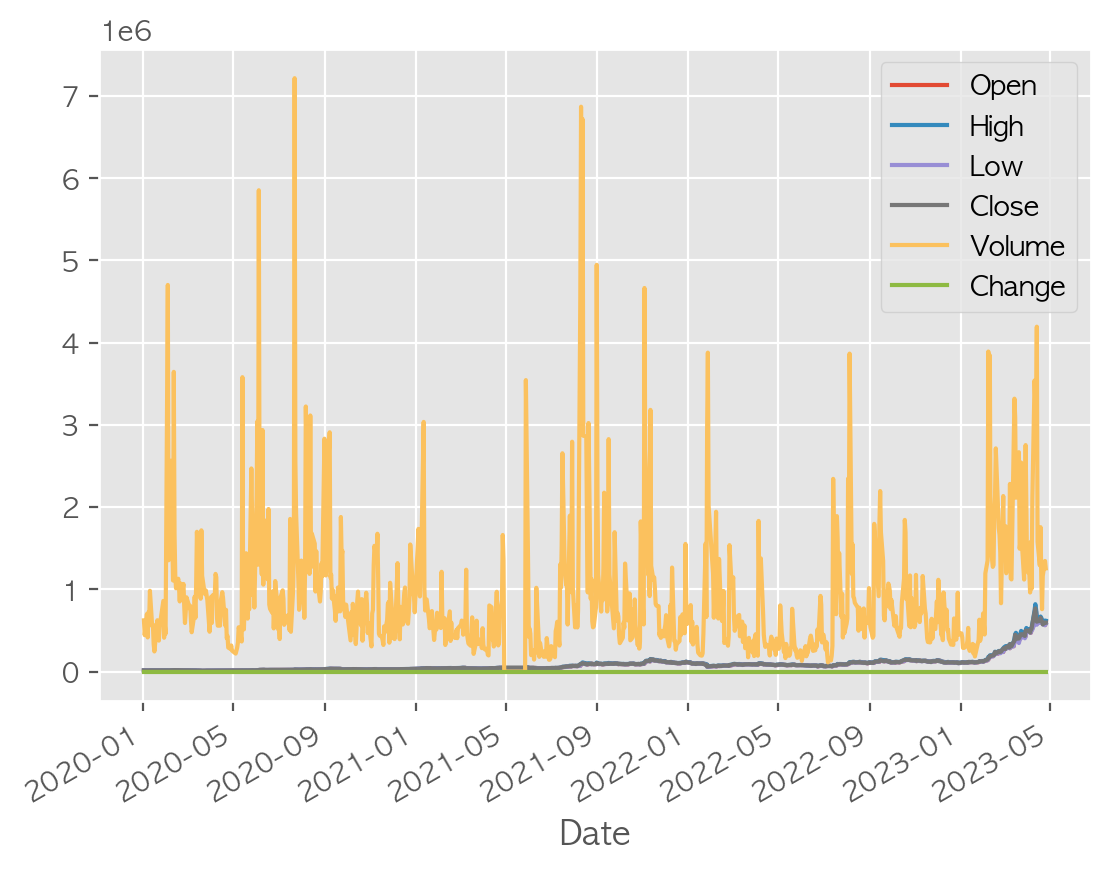

In [95]:
stock_daily.plot()

<AxesSubplot:xlabel='Date'>

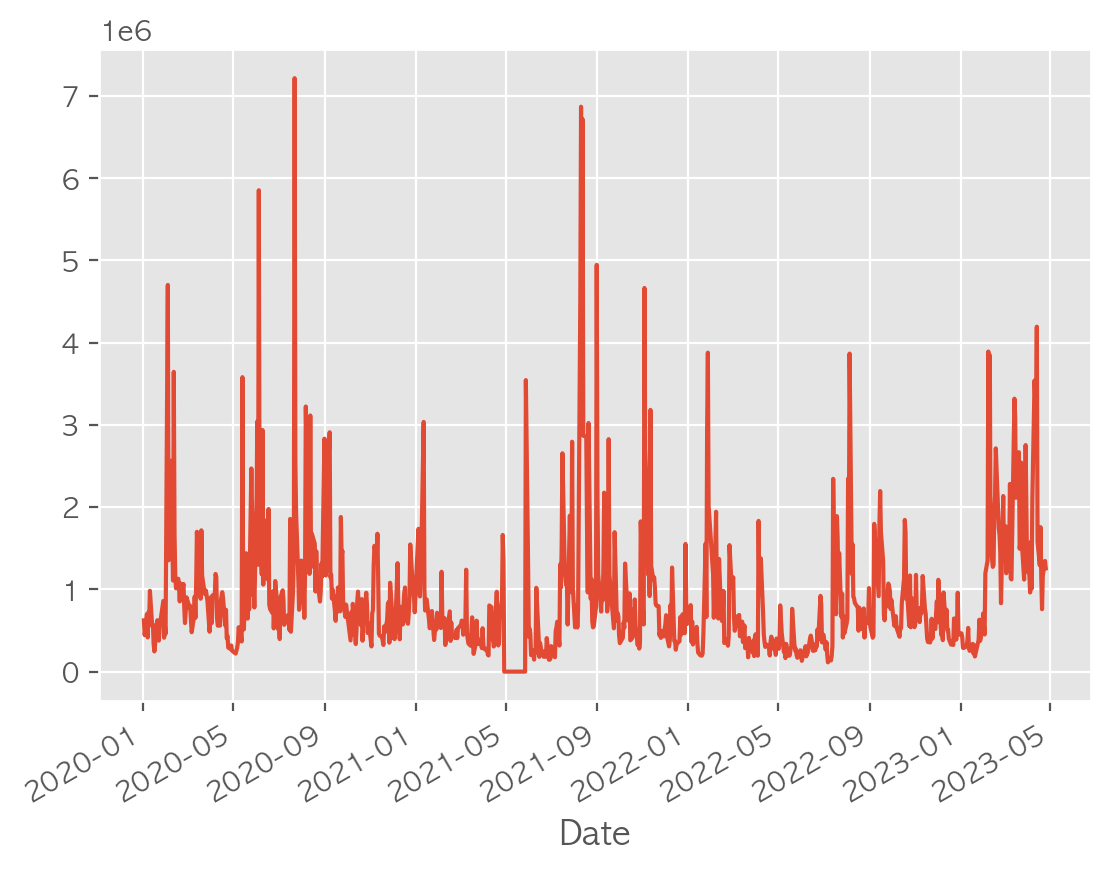

In [97]:
stock_daily["Volume"].plot()

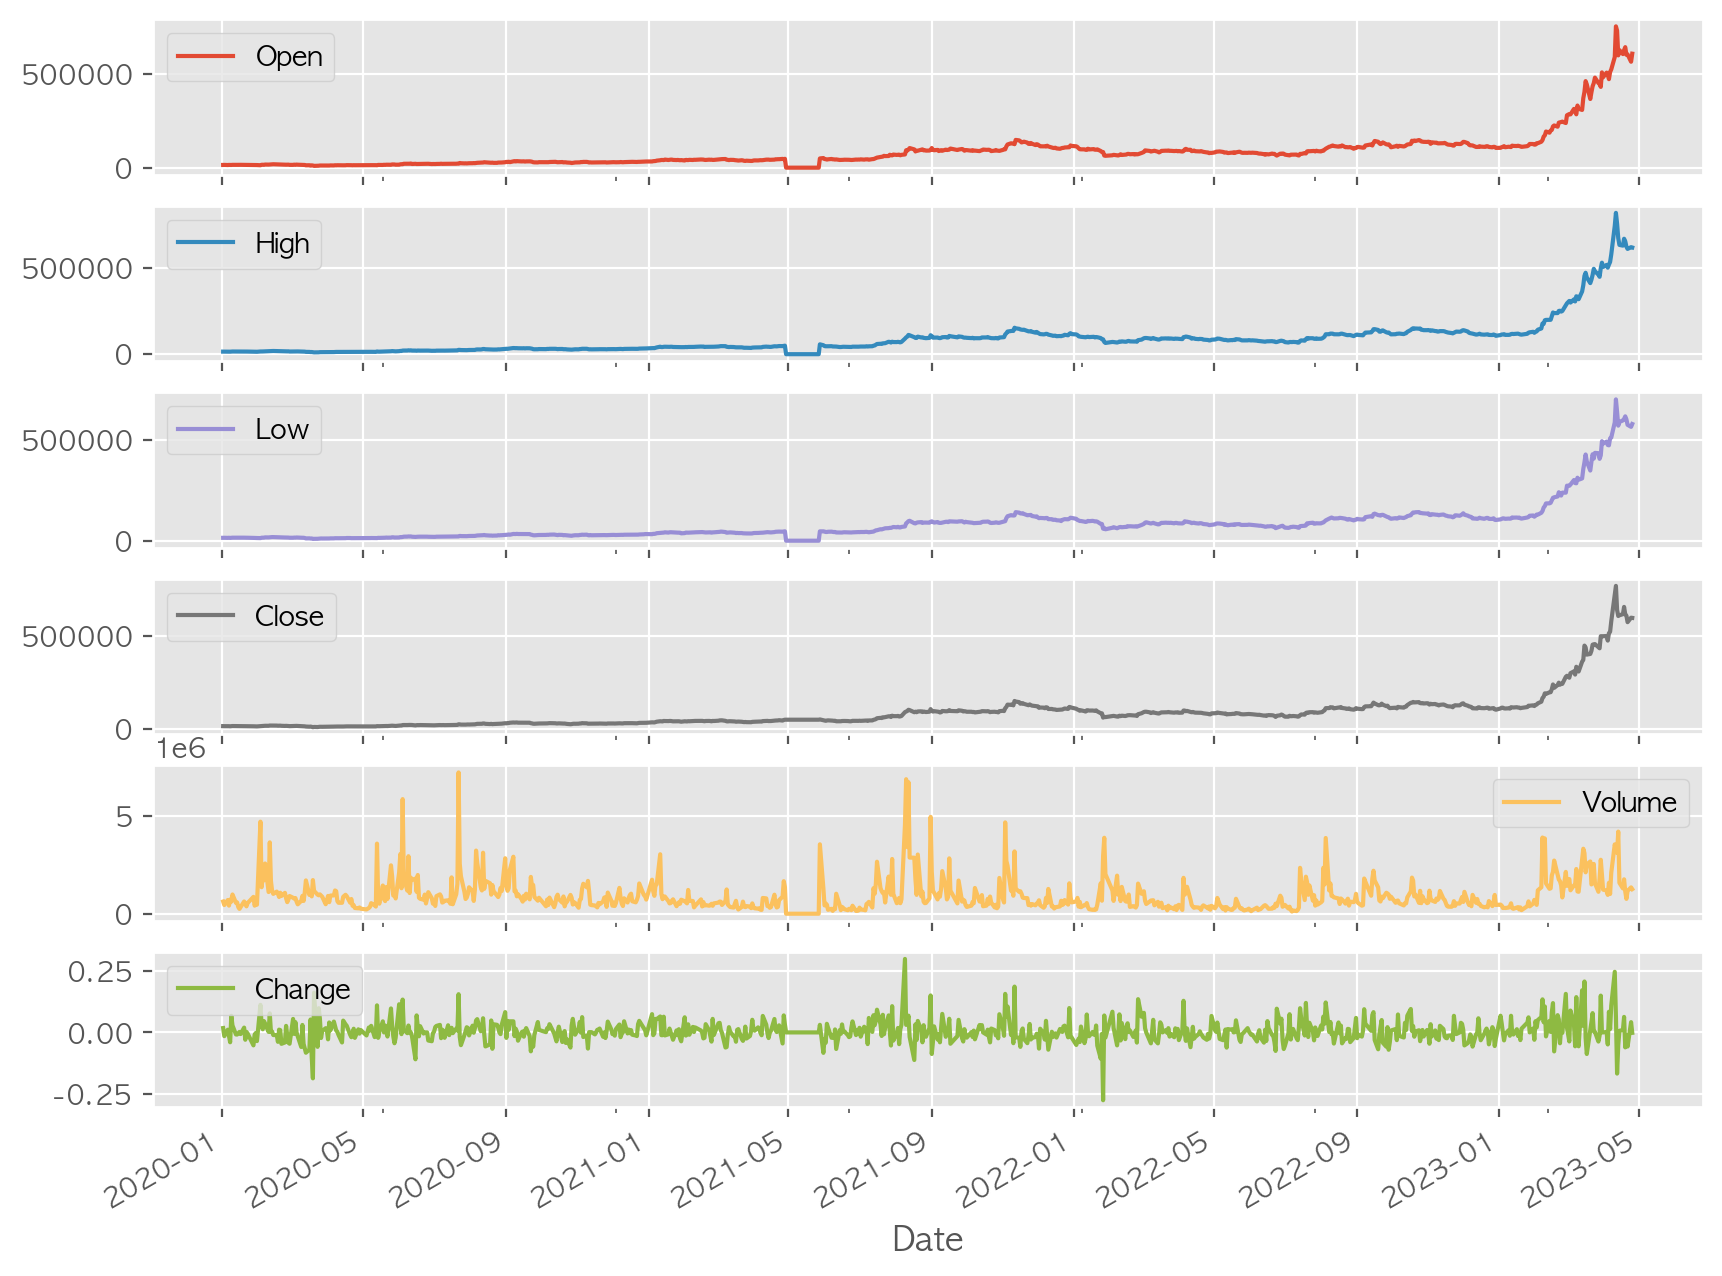

In [99]:
g = stock_daily.plot(subplots=True, figsize=(10,8))

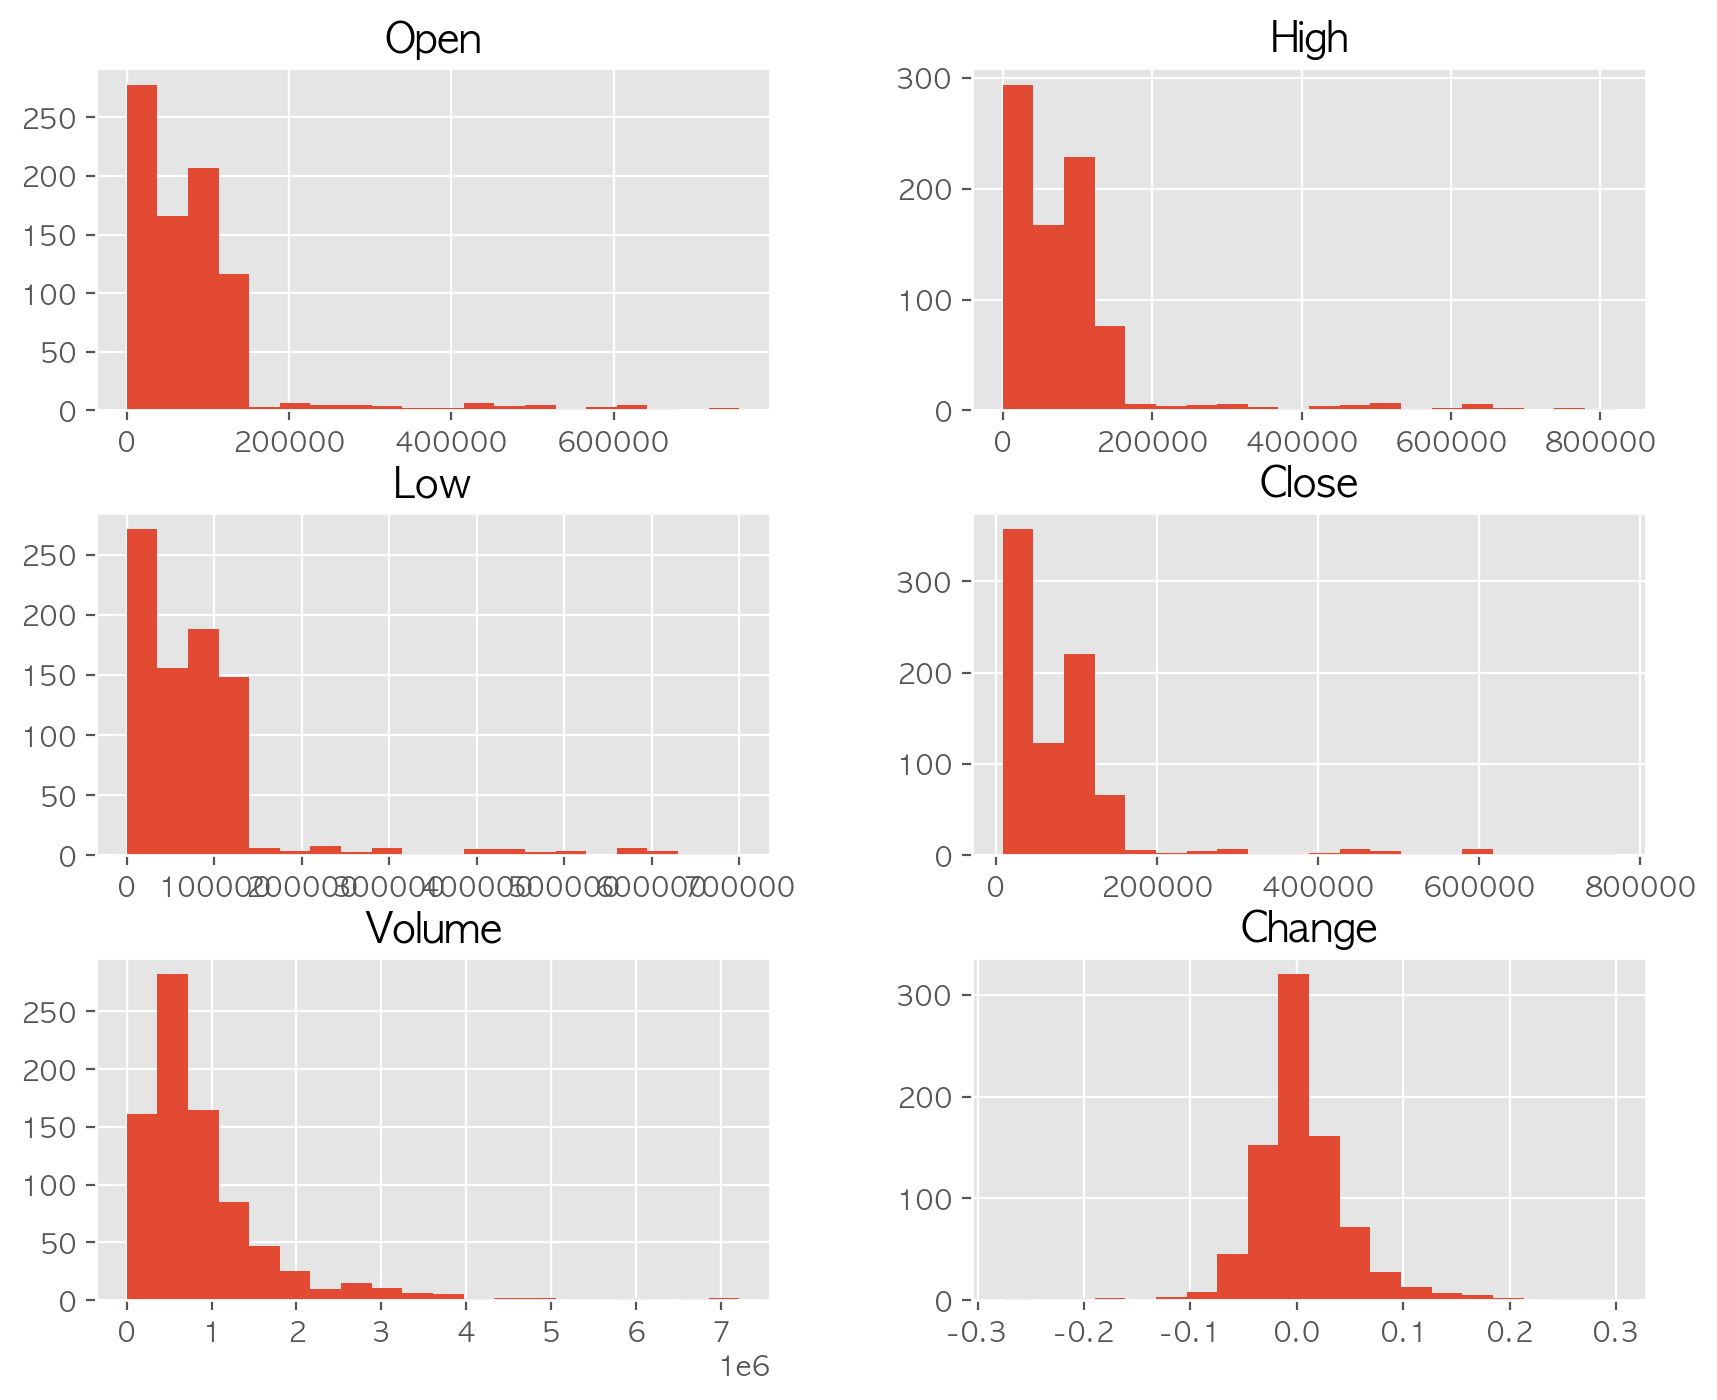

In [100]:
h = stock_daily.hist(figsize=(10,8), bins = 20)

<AxesSubplot:xlabel='Date'>

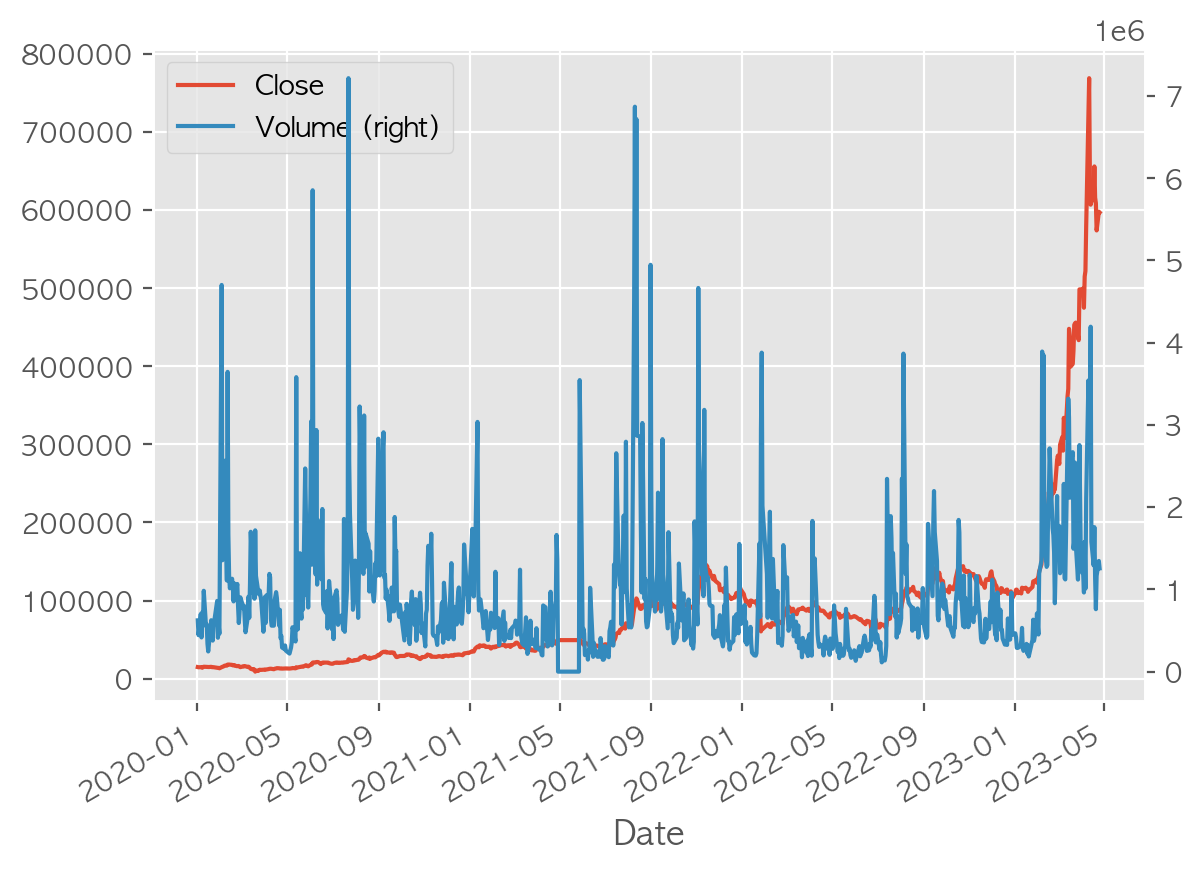

In [101]:
stock_daily[["Close","Volume"]].plot(secondary_y="Volume")

In [103]:
format(1e6, ",")

'1,000,000.0'

In [104]:
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [105]:
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [114]:
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

In [106]:
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2022", "2023") ['Close']
    item_list.append(close)

In [111]:
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2022-01-03,78600,128500,210500,191210,618000,280000,117500,376000
2022-01-04,78700,128500,210000,187357,644000,286500,117500,365500
2022-01-05,77400,125500,213500,180614,664000,295500,117500,355000
2022-01-06,76900,125000,214000,174353,690000,304500,115000,338500
2022-01-07,78300,127000,215000,175798,719000,305000,116500,338000
...,...,...,...,...,...,...,...,...
2022-12-23,58100,77800,157000,166647,610000,288500,118000,178000
2022-12-26,57900,77000,158000,169055,618000,292000,119500,178500
2022-12-27,58100,77000,158000,170500,628000,292000,119500,181000


In [112]:
item_list=[]
for item_code in stock_dict.values():
    volumn = fdr.DataReader(item_code, "2022", "2023")['Volume']
    item_list.append(close)
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2022-01-03,376000,376000,376000,376000,376000,376000,376000,376000
2022-01-04,365500,365500,365500,365500,365500,365500,365500,365500
2022-01-05,355000,355000,355000,355000,355000,355000,355000,355000
2022-01-06,338500,338500,338500,338500,338500,338500,338500,338500
2022-01-07,338000,338000,338000,338000,338000,338000,338000,338000
...,...,...,...,...,...,...,...,...
2022-12-23,178000,178000,178000,178000,178000,178000,178000,178000
2022-12-26,178500,178500,178500,178500,178500,178500,178500,178500
2022-12-27,181000,181000,181000,181000,181000,181000,181000,181000
